# Задание 

In [1]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp


## Task 1
1. Установи библиотеку sympy.
2. Используя ее функции, напиши свою функцию, которая на вход примет математическую функцию $ y=f(x)$ вида $x^2 - x + 21$, и вернёт производную: $2𝑥−1$.

In [3]:

def differentiation(Fx):
    if type(Fx) is str:
        # x = Symbol('x')
        try:
            Fx =    sp.sympify(Fx)
        except ValueError:
            print("Invalid string")
    return Fx.diff('x')

differentiation("x**2 - x + 21")

2*x - 1

## Task 2
В этот раз напиши свою функцию, которая на вход примет математическую функцию $p = f(x, y)$, зависящую от двух переменных вида $ (x-y)^2 $, а также ту переменную, по которой нужно посчитать частную производную. Функция должна вернуть частную производную этой переменной: $2𝑥−2𝑦$.

In [4]:
def custom_differentiation(Fxy, var):
    x = sp.Symbol('x')
    y = sp.Symbol('y')
    if type(Fxy) is str:
    
        try:
            Fxy =    sp.sympify(Fxy)
        except ValueError:
            print("Invalid string")
    if type(var) is str:
        try:
            var = sp.sympify(var)
        except:
            print("Invalid string")
    return sp.diff(Fxy, var)


custom_differentiation("(x-y)**2", "y")
custom_differentiation("(x-y)**2", "x")


2*x - 2*y

## Task 3

1. Тебе надо написать математическую функцию. Представь, что у тебя есть y_true и есть y_pred (предсказанное). Тебе надо посчитать квадрат отклонения одного от другого. Причём предсказанное значение получается при помощи функции линейной регрессии: y = wx +b. Дополнительно поделим всё это на n.
2. Нужно написать функцию Python, которая примет на вход эту функцию и ту переменную, по которой нам надо посчитать частные производные. Нас будут интересовать w и b. Именно их наилучшие значения мы и будем в дальнейшем искать. Функция должна вернуть производные сразу по обеим этим переменным.

In [5]:
x, y, w, b, n = sp.symbols('x y w b n')
func=(( y - ( w*x + b))**2) / n


def diff_03(F, var1, var2):
    return (sp.diff(F, var1), sp.diff(F, var2))

diff_03(func, w, b)

(-2*x*(-b - w*x + y)/n, (2*b + 2*w*x - 2*y)/n)

## Task 4
1. В этот раз вам надо написать класс `Gradient()`, который будет состоять из нескольких методов. Объект при инициализации получает два вектора: `X`, `Y`. Далее методы обращаются к ним уже внутри класса.
    - `predict`: на вход она получает `w`, `b`, на выход она выдаёт прогнозные значения `Y_pred`;
    - `mse`: на вход она получает `Y_pred`, на выход выдает посчитанное MSE;
    - `update`: на вход она получает `Y_pred`, `w`, `b`; на выход выдаёт новые значения `w`, `b`, которые обновились благодаря посчитанным градиентам.
2. Проверить работу методов, подав на вход класса два вектора `X`, `Y` и начальные параметры `w`, `b` в требуемые методы.

In [6]:
X = np.array(
    [32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 
     52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 
     44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 
     45.61864377, 38.81681754]
)
Y = np.array(
    [31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 
     79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 
     62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 
     48.84715332, 56.87721319]
)

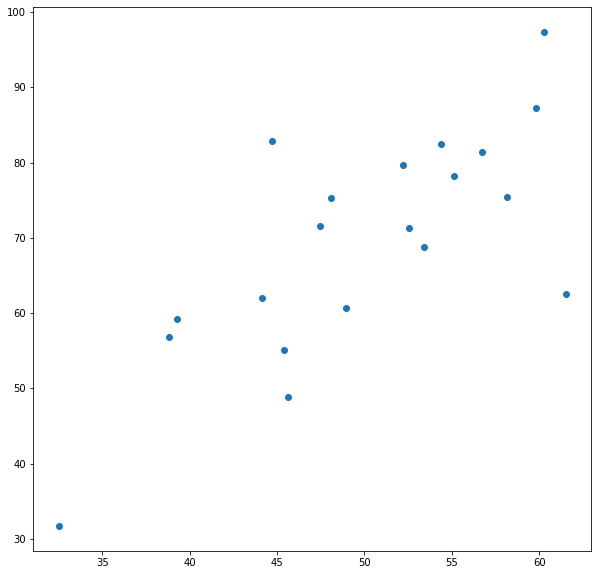

In [7]:


plt.figure(figsize=(10,10))
plt.scatter(X, Y);

In [8]:
class Gradient:
    def __init__(self, X, Y):
        self.__X = X
        self.__Y = Y
        
    def solver_w(self, w, b):
        return np.sum(-2*self.__X * (  -b - w * self.__X + self.__Y)) / len(self.__Y)
    
    def solver_b(self, w, b):
        return np.sum(2*b + 2 * w *self.__X - 2 * self.__Y) / len(self.__Y)

    def predict(self, w, b):
        return np.array(w * self.__X + b)
    
    def mse(self, Y_pred):
        mse = np.sum((self.__Y - Y_pred)**2) / len(Y_pred)
        return mse
        
    def update(self, w, b, a=0.0001):
        pa_w = self.solver_w(w, b)
        pa_b = self.solver_b(w, b)
        w = w - a * pa_w
        b = b - a * pa_b
        return (w, b)

        

In [9]:
test = Gradient(X, Y)
m = test.predict(w=0.5, b=4)
mse = test.mse(m)
mse

1784.8517253411974

## Task 5
Улучши код таким образом, чтобы появился метод `optimize`. Он должен итеративным образом пройти какое-то количество раз обновление значений `w`, `b`, придя к оптимальному значению. Критерии останова:
 - если было превышено количество заранее заданных итераций `num_iterations`;
 - если новая итерация выдала разницу между текущей ошибкой и ошибкой прошлой итерации значение, меньшее, чем `stopping_threshold`;
 - метод должен вернуть финальные значения `w`, `b`, и `mse`.


In [20]:
class GradientDescent(Gradient):
    
    def __init__(self, X, Y):
        super().__init__(X, Y)
    def optimize(self, num_iterations=200000, learning_rate = 0.0001):
        stopping_threshold = 1e-6
        w, b = 0, 0
        n = len(X)
        w_list, b_list, l_list = [], [], []
        for i in range(num_iterations):
            # добавим в списки текущие веса
            mse_curr = self.mse(self.predict(w=w, b=b))
            w_list.append(w)
            b_list.append(b)
            # и уровень ошибки
            l_list.append(mse_curr)
            # рассчитаем текущее значение частных производных
            w, b = self.update(w = w, b = b, a =learning_rate)
            if mse_curr - self.mse(self.predict(w=w, b=b)) < stopping_threshold or i > 200000:
                break
            # выведем списки с уровнями ошибки и весами
        return w_list[-1], b_list[-1], l_list[-1]

In [22]:
test = GradientDescent(X, Y)

w_fin, b_fin, mse_fin = test.optimize(num_iterations = 200000, learning_rate = 0.0001)
print(w_fin, b_fin, mse_fin)


1.3898878424064032 0.02706099488749466 98.63772259590434


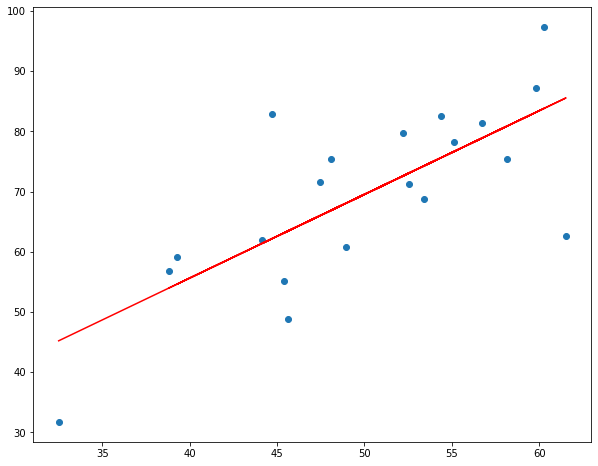

In [23]:

plt.figure(figsize = (10, 8))
plt.scatter(X, Y)
plt.plot(X, test.predict(w_fin, b_fin), 'r')
plt.show()

In [13]:
import numpy as np
import sympy as sp
X = np.array(
    [32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 
     52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 
     44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 
     45.61864377, 38.81681754]
)
Y = np.array(
    [31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 
     79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 
     62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 
     48.84715332, 56.87721319]
)
def test(x_val, y_val, b_val, w_val):
    n_val = len(x_val)
    x, y, w, b, n = sp.symbols('x y w b n')
    func=(( y - ( w*x + b))**2) / n
    dw = sp.diff(func, w)
    db = sp.diff(func, b)
    # print(dw, db, type(dw))
    dw_val = dw.subs([(x, X), (y, Y), (b, b_val), (w, w_val), (n, n_val)])
    db_val = db.subs([(x, X), (y, Y), (b, b_val), (w, w_val), (n, n_val)])
    print(dw_val, db_val)
    return np.sum(dw_val), np.sum(db_val)

# Задаем значения переменных

b_val = 1
w_val = 3

# Вызываем функцию test
dw_result, db_result = test(X, Y, b_val, w_val)

print(dw_result) # Выводит значение dw после подстановки значений переменных
print(db_result) # Выводит значение db после подстановки значений переменных

-x*(-3*x + y - 1)/10 3*x/10 - y/10 + 1/10
-x*(-3*x + y - 1)/10
3*x/10 - y/10 + 1/10


In [14]:
a_val = np.array([10, 20])
b_val = np.array([20, 40])


np_val = np.sum(a_val * b_val)
print(np_val)

a, b = sp.symbols("a b")
f1 = ((a + b) * 2)


1000
